# Hoja de Trabajo 3 

## 1. Cargando Data Set con Pandas

In [3]:
import pandas as pd 

In [4]:
df = pd.read_csv('satgpa.csv')

In [5]:
df.head(5)

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63


Cambios a realizar: Cambiar los dos por 0's asi se puede trabajar como variable dummy y agregar columna de 1's para la constante

## 2. Cambios al data Set principal

In [6]:
df['sex'] = df['sex'].replace(2,0)

In [7]:
df1 = df.assign(cons = 1)

In [8]:
df1.head()

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa,cons
0,1,65,62,127,3.40,3.18,1
1,0,58,64,122,4.00,3.33,1
2,0,56,60,116,3.75,3.25,1
3,1,42,53,95,3.75,2.42,1
4,1,55,52,107,4.00,2.63,1


En nuestro df1 ya tenemos la variable sex como dummy (0's y 1's) y nuestra nueva columna que representa la constante que la nombramos cons

## 3. Separando nuestra x con nuestro y

In [9]:
y = df1[['fy_gpa']].to_numpy()

In [10]:
print(y.shape)

(1000, 1)


Y es un array de numpy de tamaño (1000,1). Lo cual sera importante para construir nuestro array de thetas.

In [11]:
X = df1[['sex','sat_v','sat_m','hs_gpa','cons']].to_numpy()

In [12]:
print(X.shape)

(1000, 5)


x es un array de numpy de tamaño (1000,5). esto nos servira para saber el tamaño que tiene que llevar nuestras thetas aleatorias para conocer su tamaño

## 4. Definiendo función de Costo y de Gradiente

In [13]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

In [14]:
def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

## 5. Creando array de Thetas iniciales

In [15]:
m, n = X.shape

In [16]:
import numpy as np
theta_0 = np.random.rand(n,1)

In [17]:
print(theta_0.shape)

(5, 1)


Aqui podemos ver que nuestro array de theta 0 tiene una forma que si acepta nuestras funciones, por lo cual lo podemos usar para nuestro análsis

## 6. Función de Gradient Descent

In [18]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.0001, threshold=0.001, max_iter=10000): 
    
    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs
    

In [19]:
thetas, costs = gradient_descent(X,y,theta_0,linear_cost,linear_cost_gradient)

Ahora ya contamos con los resultados de Theta donde se minimizan los costos. ahora veremos como se ven en gráfica

## 7. Graficando resultados  

In [20]:
import matplotlib.pyplot as plt   

In [21]:
len(costs)

10000

In [22]:
costs_graph1 = costs[5000:10000]

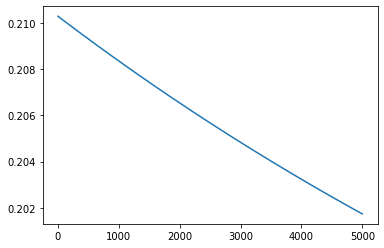

In [23]:
plt.plot(costs_graph1)

En esta gráfica logramos ver como nuestra función va sacando el menor consto posible, hasta llegar a nuestra última iteración donde el costo se disminuye. Graficamos desde el punto 5000 ya que anteriormente no podemos observar de una manera tan visual como se van reduciendo los costos por la disminución de los mismos, que en los primeros puntos disminuye fuertmente.

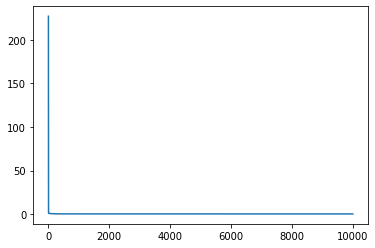

In [24]:
plt.plot(costs)

In [25]:
print(thetas)

[[ 0.12388527]
 [ 0.02064536]
 [ 0.01376702]
 [ 0.20424002]
 [-0.00301732]]
